<a href="https://colab.research.google.com/github/indrawanth/clasification_UAS/blob/main/Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

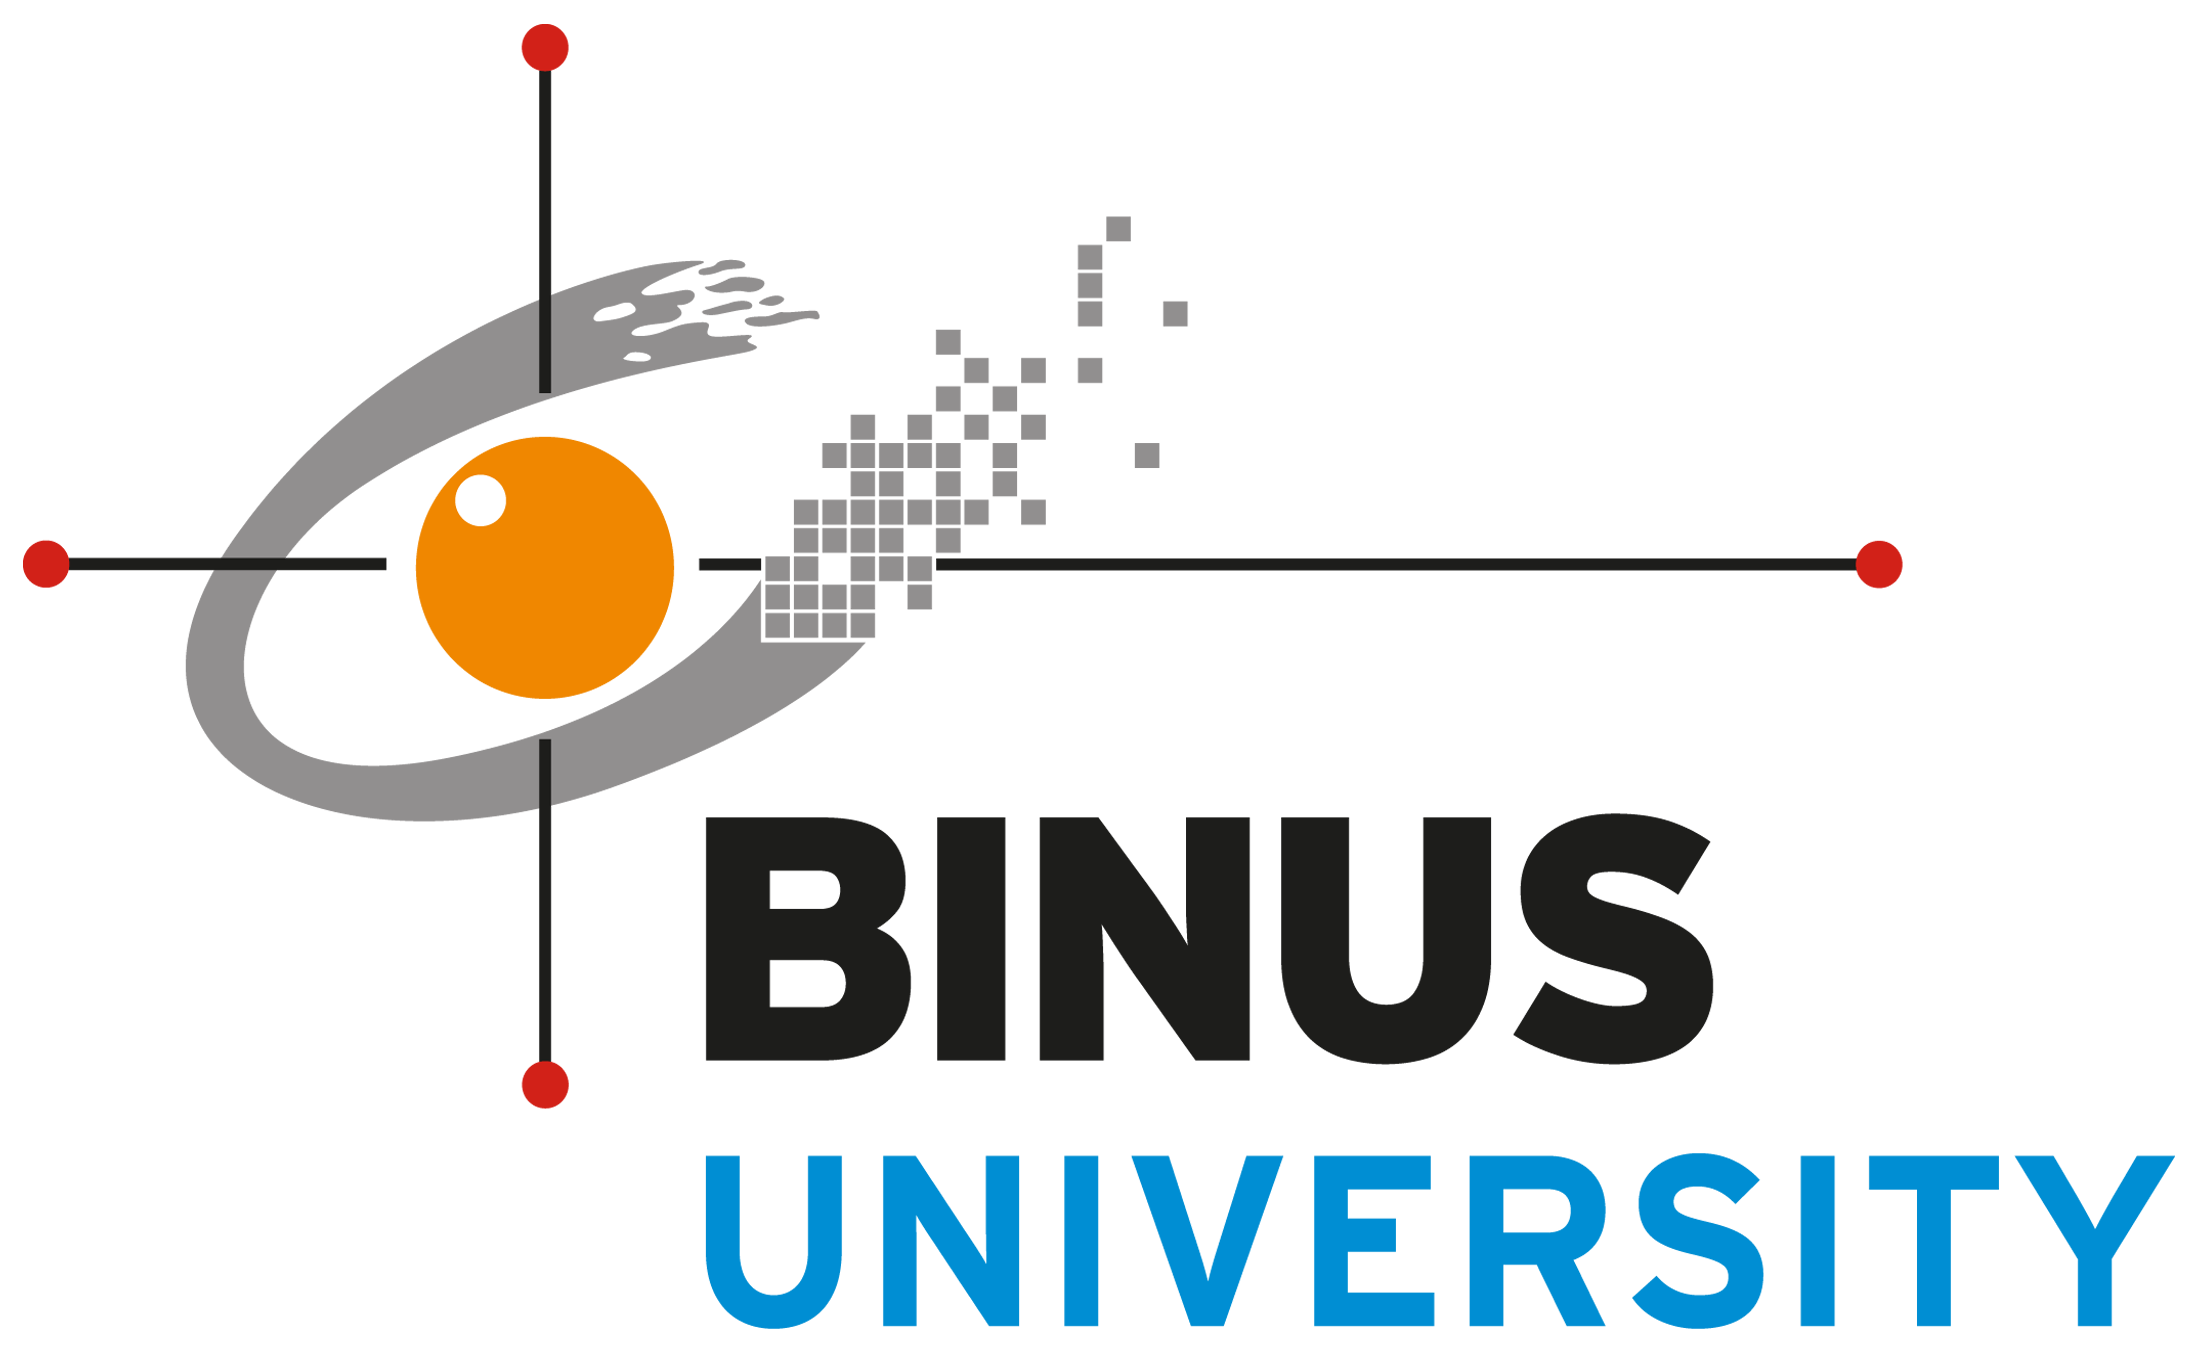
UAS MACHINE LEARNING

CLASSIFICATION CUSTOMER DATA

2502481043

INDRAWAN HADIANTO

In [ ]:
#import file dari github, memungkinkan
#tujuannya agar lebih mudah dalam penilaian, dapat di-running ulang
link = "https://github.com/indrawanth/clasification_UAS/blob/7cc4d2a8ddfc4c52ffa01dbd6b748fef2c545823/CUSTOMER%20CHURN%20TELCO.xlsx"

print(link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/"))


https://raw.githubusercontent.com/indrawanth/clasification_UAS/7cc4d2a8ddfc4c52ffa01dbd6b748fef2c545823/CUSTOMER%20CHURN%20TELCO.xlsx


In [ ]:
#import data dari github link

import pandas as pd
import io
import requests

github_url = 'https://raw.githubusercontent.com/indrawanth/clasification_UAS/7cc4d2a8ddfc4c52ffa01dbd6b748fef2c545823/CUSTOMER%20CHURN%20TELCO.xlsx'
response = requests.get(github_url)
df = pd.read_excel(io.BytesIO(response.content))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA UNDERSTANDING

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


REMOVE UNNECESSARY FEATURES

In [ ]:
features_to_drop = ['customerID', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
df = df.drop(columns=features_to_drop)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,151.65,Yes


ENCODING DATA TYPES

In [ ]:
#mamanggil library
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#convert data types

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
partner_dtype = df['Partner'].dtype

object_features = df.select_dtypes(include=[partner_dtype]).columns

if 'Churn' not in object_features:
    object_features = object_features.append(pd.Index(['Churn']))


#encoding data
for feature in object_features:
  le = LabelEncoder()
  df[feature] = le.fit_transform(df[feature])

numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features.difference(object_features)

if 'tenure' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['tenure']))

if 'MultipleLines' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['MultipleLines']))

if 'InternetService' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['InternetService']))

if 'OnlineSecurity' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['OnlineSecurity']))

if 'OnlineBackup' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['OnlineBackup']))

if 'DeviceProtection' not in numerical_features:
    numerical_features = numerical_features.append(pd.Index(['DeviceProtection']))


#normalisasi skala
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,Churn
0,0,0.0,1,0,0.013889,0,0.5,0.0,0.0,1.0,0.0,0,0,0,0,0.001275,0
1,1,0.0,0,0,0.472222,1,0.0,0.0,1.0,0.0,1.0,0,0,0,1,0.215867,0
2,1,0.0,0,0,0.027778,1,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0.010310,1
3,1,0.0,0,0,0.625000,0,0.5,0.0,1.0,0.0,1.0,2,0,0,1,0.210241,0
4,0,0.0,0,0,0.027778,1,0.0,0.5,0.0,0.0,0.0,0,0,0,0,0.015330,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   int64  


BUILDING MODEL (KERAS)

In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

#training data
X = df.drop(columns=['tenure', 'Partner','Dependents', 'PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'])  # Features
y = df['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


DEFINE MODEL (RELU)

In [ ]:
model = keras.Sequential([
  layers.Input(shape=(X_train.shape[1],)),  # Input layer
  layers.Dense(64, activation='relu'),  # Hidden layer 1
  layers.Dense(32, activation='relu'),  # Hidden layer 2
  layers.Dense(1, activation='sigmoid')  # Output layer (adjust activation)
 ])


#gunakan softmax
import tensorflow as tf
import base64
from PIL import Image
import io

probabilities = tf.nn.softmax_cross_entropy_with_logits

# Your base64 image data
base64_image_data = 'iVBORw0KGgoAAAANSUhEUgAACJoAAAVLCAYAAABgZlB/AAAACXBIWXMAAC4jAAAuIwF4pT92AAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQ'

EVALUASI MODEL LOSS ACCURACY

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss and metrics based on your task
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9106 - loss: nan   
Test Loss: nan
Test Accuracy: 0.9134137630462646


EVALUASI MODEL DENGAN CONFUSION MATRIX

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


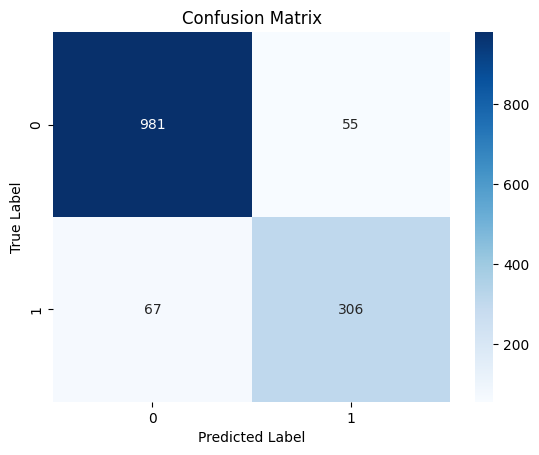

In [ ]:
#install library
!pip install scikit-learn matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

#tentukan model prediktif
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

#buat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()